In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [2]:
df = pd.read_csv('./datasets/last_elec.csv')
df.drop('합계 일사량', axis=1, inplace=True)

In [3]:
df

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
0,서울특별시,종로구,주택용,2015,1,2.414819e+07,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
1,서울특별시,종로구,일반용,2015,1,1.181337e+08,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
2,서울특별시,종로구,교육용,2015,1,9.619909e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
3,서울특별시,종로구,산업용,2015,1,6.580369e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
4,서울특별시,종로구,농사용,2015,1,2.848000e+03,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43916,울산광역시,울주군,교육용,2022,1,9.139668e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43917,울산광역시,울주군,산업용,2022,1,1.030417e+09,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43918,울산광역시,울주군,농사용,2022,1,6.842901e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43919,울산광역시,울주군,가로등,2022,1,2.703994e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


In [4]:
# 가로등(streetlight)
sl = df.copy()

In [5]:
sl.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시'],
      dtype=object)

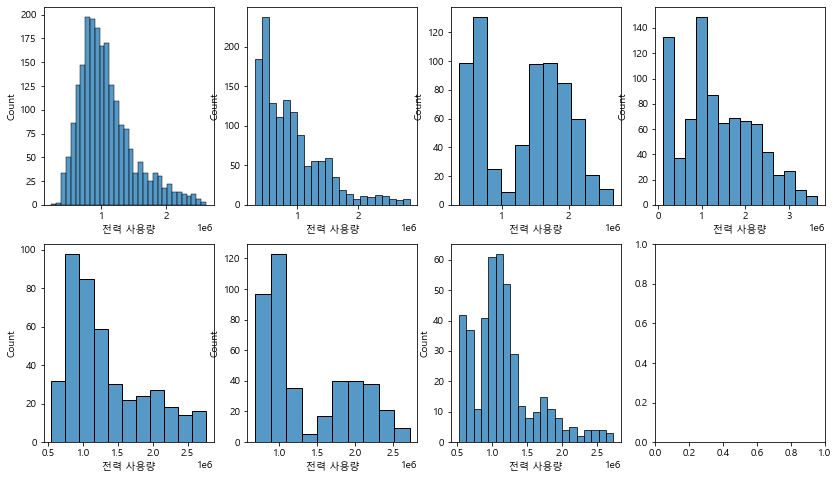

In [6]:
# 시도별 가로등
import seaborn as sns

fig , axs = plt.subplots(figsize=(14,8), nrows=2, ncols=4)

sido = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']
for i in range(len(sido)):
    row = i// 4
    col = i % 4
    sns.histplot(sl[(sl['시도']==sido[i])&(sl['계약종별']=='가로등')]['전력 사용량'], ax = axs[row][col])
#     plt.title(sido[i] +' '+ '가로등', ax=axs[row][col])

In [9]:
sl = sl[(sl['계약종별']=='가로등')]
sl

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
5,서울특별시,종로구,가로등,2015,1,1146090.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
11,서울특별시,중구,가로등,2015,1,1725615.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
18,서울특별시,용산구,가로등,2015,1,1500780.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
25,서울특별시,성동구,가로등,2015,1,1267279.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
32,서울특별시,동대문구,가로등,2015,1,1216158.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43891,울산광역시,북구,가로등,2022,1,1497624.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43898,울산광역시,동구,가로등,2022,1,790738.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43905,울산광역시,중구,가로등,2022,1,1286843.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43912,울산광역시,남구,가로등,2022,1,1397869.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


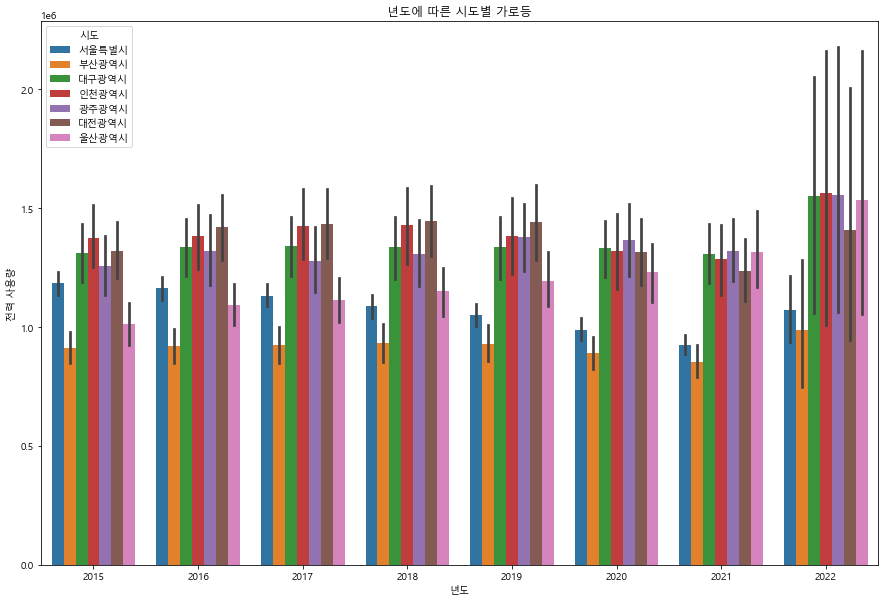

In [11]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=sl, x='년도', y='전력 사용량', hue='시도')
plt.title('년도에 따른 시도별 가로등')
plt.show()
sfig = splot.get_figure()
# sfig.savefig('년도에 따른 시도별 가로등.png')

In [13]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')


In [14]:
outlier_iqr(sl, '전력 사용량')

IQR은 733574.0 이다.
lower bound 값은 -359244.5 이다.
upper bound 값은 2575051.5 이다.
총 이상치 개수는 123 이다.


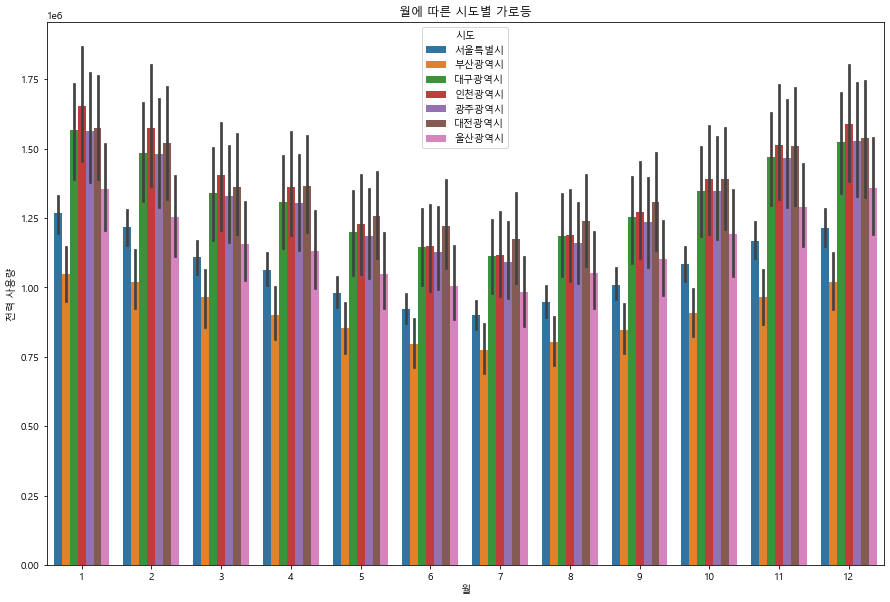

In [16]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=sl, x='월', y='전력 사용량', hue='시도')
plt.title('월에 따른 시도별 가로등')
plt.show()
sfig = splot.get_figure()
# sfig.savefig('년도에 따른 시도별 가로등.png')

부산광역시가 모든연도와 달에서 가로등 전력소비량이 가장 적고 인천광역시가 모든 달에서 평균 전력 사용량이 가장 높다.
여름에는 밤이 짧고 겨울에는 밤이 길기 때문에 계절성을 월단위 그래프에서 볼 수 있다.

In [19]:
night = df.copy()

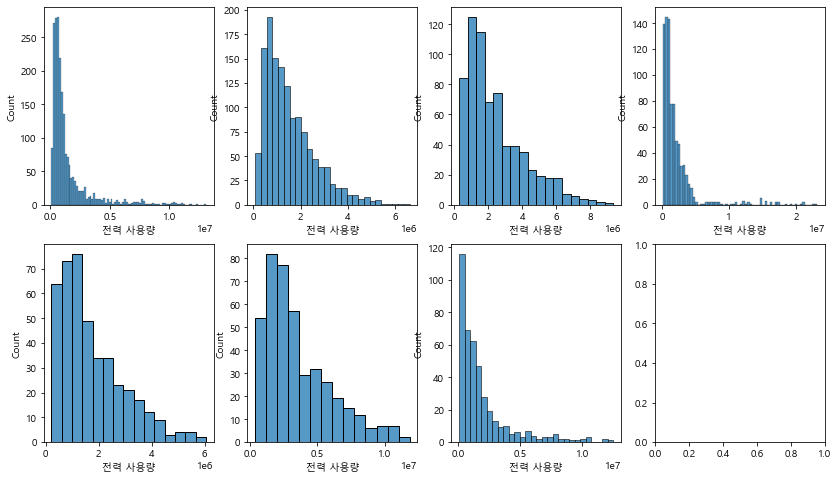

In [20]:
# 시도별 심야
import seaborn as sns

fig , axs = plt.subplots(figsize=(14,8), nrows=2, ncols=4)

sido = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']
for i in range(len(sido)):
    row = i// 4
    col = i % 4
    sns.histplot(night[(night['시도']==sido[i])&(night['계약종별']=='심 야')]['전력 사용량'], ax = axs[row][col])
#     plt.title(sido[i] +' '+ '가로등', ax=axs[row][col])

In [21]:
dn = night[(night['계약종별']=='심 야')]
dn

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
6,서울특별시,종로구,심 야,2015,1,4822017.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
12,서울특별시,중구,심 야,2015,1,1197573.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
19,서울특별시,용산구,심 야,2015,1,989022.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
26,서울특별시,성동구,심 야,2015,1,813210.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
33,서울특별시,동대문구,심 야,2015,1,1307186.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43892,울산광역시,북구,심 야,2022,1,1321124.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43899,울산광역시,동구,심 야,2022,1,627804.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43906,울산광역시,중구,심 야,2022,1,963254.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43913,울산광역시,남구,심 야,2022,1,2863046.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


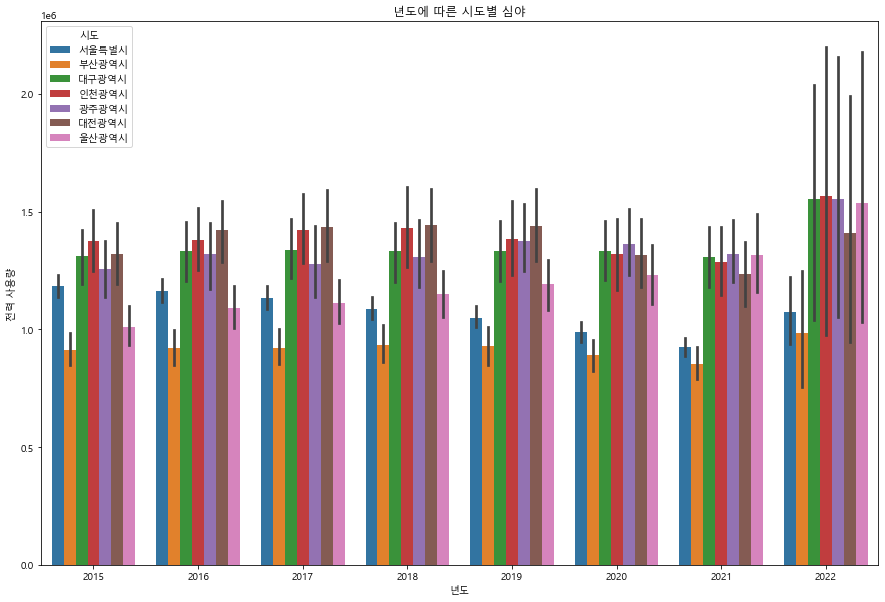

In [22]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=sl, x='년도', y='전력 사용량', hue='시도')
plt.title('년도에 따른 시도별 심야')
plt.show()
sfig = splot.get_figure()
# sfig.savefig('년도에 따른 시도별 심야.png')

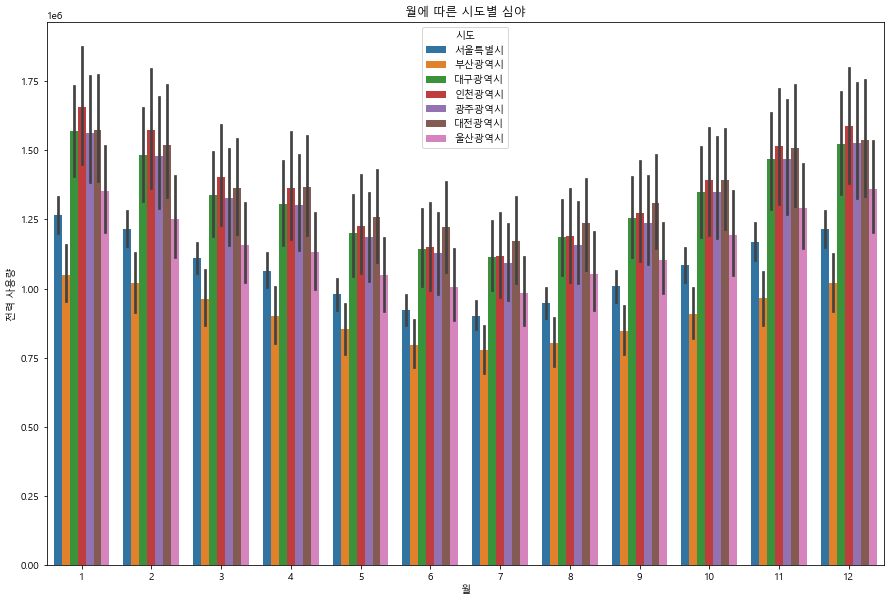

In [25]:
plt.figure(figsize=(15, 10))
splot = sns.barplot(data=sl, x='월', y='전력 사용량', hue='시도')
plt.title('월에 따른 시도별 심야')
plt.show()
sfig = splot.get_figure()
# sfig.savefig('월에 따른 시도별 심야.png')

In [24]:
outlier_iqr(dn, '전력 사용량')

IQR은 1677173.5 이다.
lower bound 값은 -1868907.25 이다.
upper bound 값은 4839786.75 이다.
총 이상치 개수는 441 이다.
